# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

**Question 6: Coding Life in Lower Dimensions**

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA.

**6a)** Code up and run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the minimum number of principal components that contribute to at least 90% of the variance in the dataset.

**Note: Write the code from scratch for PCA. The only exception** is the computation of eigenvalues and eigenvectors for which you could use the numpy in-bulit function (specifically, do NOT use other functions like numpy.cov). If you have doubts about whether a particular library function can be used, please ask in Ed Discussion and we will clarify.

In [2]:
# Cell type : CodeWrite
# Write in this cell any helper/utility functions you may need for the perform_PCA function below.
# Some sample functions are given here as recommendations, however feel free to write your own.
def compute_cov(Data):
    # your code here (use 1/N factor and not 1/(N-1) in sample covariance calcn.)
    mean = compute_mean(Data)
    Data_centered = Data - mean
    sampleCovarMatrix = Data_centered.T @ Data_centered / Data.shape[0]
    return sampleCovarMatrix

def compute_mean(Data):
    # your code here
    colMeans = np.array(list(map(lambda col: sum(col)/len(col),zip(*Data))))
    return colMeans
# add other helper/util fns. as needed

The number of PCs contributing to at least 90% of the total variance is: 21


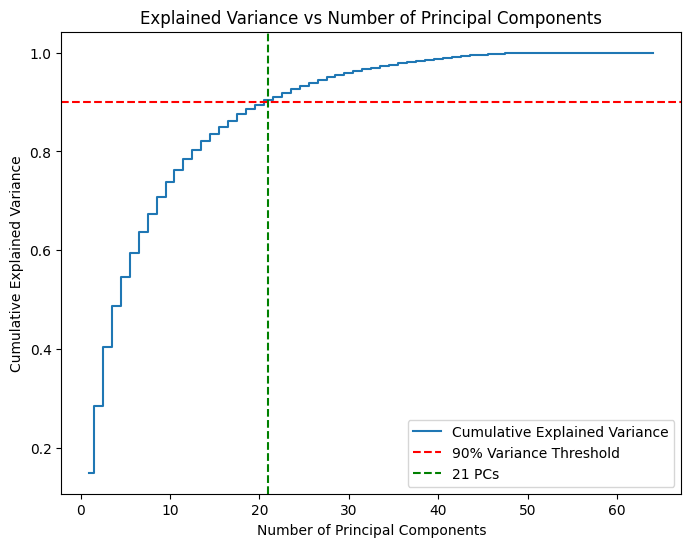

In [3]:
# Cell type : CodeWrite
# Write the function for PCA here.
def perform_PCA(Data, M=None):
    """ Perform PCA on the input data matrix
        Feel free to modify the function arguments and outputs to your needs -- what we've provided here is just our recommended function signature, which you can ovverride.
        Also feel free to use any helper/utility functions from the previous cell.

    Arguments:
        Data: dataset of shape N x D (n_samples x n_features)
        M: (aka n_PCs) focus on only the top M PCs (Principal Components).
            Should satisfy: 1 <= M <= D.
            If M=None, then we set M=D (i.e., focus on all the PCs).

    Returns:
        dimreduced_D: transformed (dimensionality-reduced) data of shape N x M (n_samples x n_PCs)
        selPCs: top M selected PCs in a matrix of shape D x M (n_features x n_PCs)
        explained_variances: amount of variance explained by each of the selPCs of shape M x 1 (n_PCs x 1)
                             (these are the eigenvalues of the sample covar. matrix, sorted in non-ascending order)
    """
    #your code here
    #ensure that explained_variances (eigenvalues) are sorted in descending order
    data = Data
    N, D = data.shape
    mean = compute_mean(Data).reshape(-1,1)
    data_meaned = data - mean.T
    if M is None:
      M = D
    cov_matrix = compute_cov(data)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    selPCs = eigenvectors[:, :M]
    explained_variances = eigenvalues[:M] / np.sum(eigenvalues)
    dimreduced_D = data_meaned @ selPCs @ selPCs.T + mean.T
    return dimreduced_D, selPCs, explained_variances

def plot_cumulative_percent_variance(explained_variances):
    # your code here to plot the # of chosen top PCs along the x-axis and cumulative percentage variance explained by these chosen PCs along the y-axis
    # your code to use the computed cumulative pct. variance to report the min # of PCs contributing to at least 90% of the total variance in the data
    cumulative_variance = np.cumsum(explained_variances)
    numTopPCs = np.where(cumulative_variance >= 0.9)[0][0] + 1
    print(f'The number of PCs contributing to at least 90% of the total variance is: {numTopPCs}')
    plt.figure(figsize=(8,6))
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',label='Cumulative Explained Variance')
    plt.ylabel('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
    plt.axvline(x=numTopPCs, color='g', linestyle='--', label=f'{numTopPCs} PCs')
    plt.legend(); plt.title('Explained Variance vs Number of Principal Components')
    # plt.savefig('plots/explained_variance.pdf')
    plt.show()
    return

image_data = np.load('data/Data.npz')
lst = image_data.files
dimreduced_D, selPCs, explained_variances = perform_PCA(image_data[lst[0]], M=None)
plot_cumulative_percent_variance(explained_variances)

**Cell type : TextRead**

**6b)**  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions $M \in \{2,4,8,16\}$. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

In [4]:
# Cell type : CodeWrite
# Write the code for data reconstruction, and run the algorithm for selecting the number of dimensions.

# dimreduced_D, _, _ = perform_PCA(image_data[lst[0]], M=None)
dimreduced_D_2, _, _ = perform_PCA(image_data[lst[0]], M=2)
dimreduced_D_4, _, _ = perform_PCA(image_data[lst[0]], M=4)
dimreduced_D_8, _, _ = perform_PCA(image_data[lst[0]], M=8)
dimreduced_D_16, _, _ = perform_PCA(image_data[lst[0]], M=16)

mse_2 = np.mean((image_data[lst[0]] - dimreduced_D_2)**2)
mse_4 = np.mean((image_data[lst[0]] - dimreduced_D_4)**2)
mse_8 = np.mean((image_data[lst[0]] - dimreduced_D_8)**2)
mse_16 = np.mean((image_data[lst[0]] - dimreduced_D_16)**2)
# mse_all = np.mean((image_data[lst[0]] - dimreduced_D)**2)

# print(f'MSE for M=2: {np.round(mse_2, 6)}, M=4: {np.round(mse_4, 6)}, M=8: {np.round(mse_8, 6)}, M=16: {np.round(mse_16, 6)}, M=all: {np.round(mse_all, 6)}')
print(f'MSE for M=2: {np.round(mse_2, 6)}, M=4: {np.round(mse_4, 6)}, M=8: {np.round(mse_8, 6)}, M=16: {np.round(mse_16, 6)}')
image_data.close()
print(f'As the loss for M=16 is lowest among all tested dimensions, we can choose M=16 as the optimal number of dimensions for this dataset.')

MSE for M=2: 13.421012, M=4: 9.627986, M=8: 6.121793, M=16: 2.827183
As the loss for M=16 is lowest among all tested dimensions, we can choose M=16 as the optimal number of dimensions for this dataset.



**Cell type : TextRead**

**6c)** Let's now apply the same PCA code that you've written above to analyze images to understand text. Large language models (LLMs) typically analyze text by representing words as vectors, also known as embeddings. You are provided with 768-dimensional embeddings (extracted from a LLM called BERT) of 10 words in the [folder](https://drive.google.com/drive/folders/1yshmnkWoALf2ZwqgZqWwXJk2W5_XuCLG?usp=sharing).

Apply your PCA code with $M=2$ PCs on these embeddings to visualize the 10 words in 2-D. Report how much percentage of variation is captured by these two PCs. What does this (2D scatterplot) visualization tell you about the embeddings of related vs. unrelated words?

(Note: If applying the same PCA code to this embeddings data matrix $X$ takes a long time, then consider applying it to $X^T$ and use the returned PCs to derive the PCs of $X$ as in question Q3 of the Assignment.)

Percentage of variation captured by the first 2 PCs: 45.47%


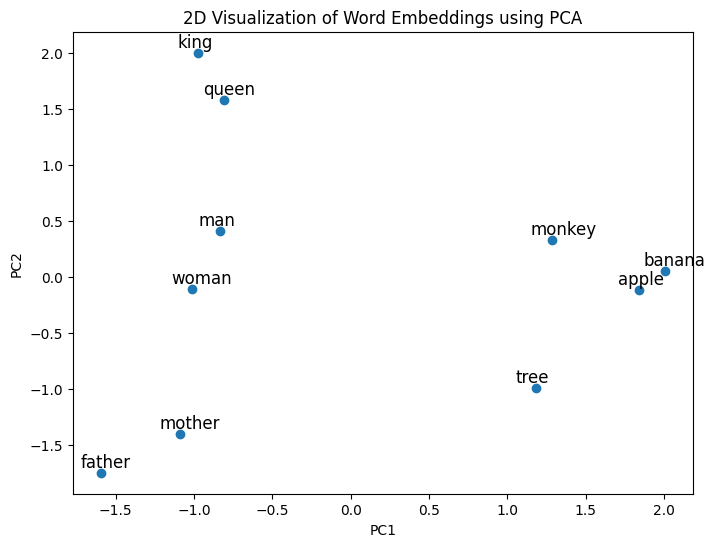

In [5]:
# Cell type : CodeWrite
# Write your code here as instructed.
# (Use the function(s) written previously)
embeddings = {}
words = []
with open("data/prml_asst_2_word_embeddings.txt", "r") as f:
    for line in f:
        tokens = line.strip().split()
        word = tokens[0]
        vector = [float(x) for x in tokens[1:]]
        embeddings[word] = vector
        words.append(word)

text_data = np.array(list(embeddings.values()))
_, selPCs, explained_variances = perform_PCA(text_data, M=2)
captured_variance = np.sum(explained_variances[:2])
print(f"Percentage of variation captured by the first 2 PCs: {captured_variance:.2%}")
mean_text = np.mean(text_data, axis=0)
text_data_meaned = text_data - mean_text
projected_text = text_data_meaned @ selPCs

plt.figure(figsize=(8, 6))
plt.scatter(projected_text[:, 0], projected_text[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (projected_text[i, 0], projected_text[i, 1]), fontsize=12, xytext=(-15, 4), textcoords='offset points')

plt.xlabel('PC1')
plt.ylabel('PC2'); plt.title('2D Visualization of Word Embeddings using PCA')
# plt.savefig('plots/word_embeddings_pca.pdf')
plt.show()